In [3]:
import os
import json
import numpy as np
import math
from skimage.measure import block_reduce
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def read_train_data():
    # Load the data dictionary with all the arrays
    with open(os.path.join(data_dir, data_filename)) as f:
        data_dict = json.load(f)

    # Load the text labels dictionary
    with open(os.path.join(data_dir, labels_filename)) as f:
        labels_dict = json.load(f)

    # Find the maximum size for any array and any text label
    # so that we can create fixed sized numpy arrays
    max_data_size = 0
    max_text_size = 0
    num_rows = 0
    for filename, val in data_dict.items():
        num_rows += 1

        data_size = len(data_dict[filename])
        if data_size > max_data_size:
            max_data_size = data_size

        text_size = len(labels_dict[filename])
        if text_size > max_text_size:
            max_text_size = text_size

    # We will reduce the size of our arrays
    # by using the block_reduce function
    # and averaging array values in intervals of FILTER_SIZE
    new_size = math.ceil(max_data_size / FILTER_SIZE)
    # Now we have our fixed size array for our down-sampled data
    data = np.zeros((num_rows, new_size))

    texts = []
    i = 0
    for filename, arr in data_dict.items():

        #turning all values positive before taking the mean (change by ankur)
        arr = np.absolute(arr)

        new_arr = block_reduce(np.array(arr), block_size=(FILTER_SIZE,), func=np.mean)
        new_arr_size = len(new_arr)
        # The array is probably smaller than the maximum allowed length
        # So let's set the boundary for that
        data[i, :new_arr_size] = new_arr

        text = labels_dict[filename]
        # We are padding text labels with empty strings if they are short
        texts.append(text.ljust(max_text_size).lower())
        i += 1

    text_data = np.array(texts)
    return data, text_data

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd "gdrive/Shared drives/deep learning"
data_dir = "data"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/Shared drives/deep learning'
/content/gdrive/Shared drives/deep learning


In [5]:
## ----- Don't run this cell ----- ##
## ----- READING RAW DATA ----- ##

'''SAMPLING_RATE = 5500
FILTER_SIZE = SAMPLING_RATE // 100

data_dir = "."
data_filename = os.path.join(data_dir, "data_sample_train.json")
labels_filename = os.path.join(data_dir, "labels_sample_train.json")
print(os.getcwd())
data, text_data = read_train_data()
data = data.reshape(np.append(data.shape, 1))

print("Data array shape: ", data.shape, "\nFirst 2 rows:")
print(data[:2], end='\n\n')

print("Text labels shape: ", text_data.shape, "\nFirst 2 rows:")
print(text_data[:2], end='\n\n')'''

'SAMPLING_RATE = 5500\nFILTER_SIZE = SAMPLING_RATE // 100\n\ndata_dir = "."\ndata_filename = os.path.join(data_dir, "data_sample_train.json")\nlabels_filename = os.path.join(data_dir, "labels_sample_train.json")\nprint(os.getcwd())\ndata, text_data = read_train_data()\ndata = data.reshape(np.append(data.shape, 1))\n\nprint("Data array shape: ", data.shape, "\nFirst 2 rows:")\nprint(data[:2], end=\'\n\n\')\n\nprint("Text labels shape: ", text_data.shape, "\nFirst 2 rows:")\nprint(text_data[:2], end=\'\n\n\')'

In [6]:
## ----- READING DOWNSAMPLED DATA ----- ##

data_filename = os.path.join(data_dir, "training_data_labels.json")
with open(data_filename) as f:
  data_dict = json.load(f)
  data = np.array(data_dict["training_data"])
  data = data.reshape(np.append(data.shape, 1))
  
  text_data = np.array(data_dict["training_labels"])

print("Data array shape: ", data.shape, "\nFirst 2 rows:")
print(data[:2], end='\n\n')

print("Text labels shape: ", text_data.shape, "\nFirst 2 rows:")
print(text_data[:2], end='\n\n')

if (data[1]==text_data[2]):
  print("hello")

Data array shape:  (12237, 6613, 1) 
First 2 rows:
[[[0.04407315]
  [0.04305174]
  [0.05130609]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.04407315]
  [0.04305174]
  [0.05130609]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]

Text labels shape:  (12237,) 
First 2 rows:
['the film won the naacp image award for outstanding'
 'the keystone bridge company, founded in 1865 by an']



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [7]:
alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789,.?;:-_()=+@$!&/\'\" '
alphabet_size = len(alphabet)

# Define a mapping between characters and indices
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

max_text_length = 0
for d in text_data:
  l = len(d)
  if l > max_text_length:
    max_text_length = l

num_rows = len(text_data)
labels = np.empty((num_rows, max_text_length, alphabet_size))

for i, d in enumerate(text_data):
  # Target text data -> integer encodings
  integer_encodings = [char_to_int[char] for char in d]

  # -> one-hot encodings
  one_hot = tf.one_hot(indices=integer_encodings, depth=alphabet_size)
  labels[i] = one_hot.numpy()

In [8]:
i = 5
print(len(text_data[i]))
print(text_data[i], end="\n\n")

print(labels[i].shape)
print(labels[i])

50
it was later renamed rogers majestic corporation l

(50, 55)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
def create_model(time_window_size, max_text_length, alphabet_size):
        model = tf.keras.models.Sequential()

        model.add(layers.Conv1D(filters=16, kernel_size=3, padding='same', input_shape=(time_window_size, 1)))
        model.add(layers.LeakyReLU())
        model.add(layers.MaxPooling1D(pool_size=15, strides=13))

        model.add(layers.Conv1D(filters=32, kernel_size=3, padding='same'))
        model.add(layers.BatchNormalization(trainable=True))
        model.add(layers.LeakyReLU())
        model.add(layers.MaxPooling1D(pool_size=12, strides=10))

        # model.add(layers.LSTM(units=256))

        model.add(layers.Bidirectional(layers.LSTM(units=256, return_sequences=True, dropout=0.25), name='bi_lstm1'))
        model.add(layers.Bidirectional(layers.LSTM(units=256, return_sequences=True, dropout=0.25), name='bi_lstm2'))
        model.add(layers.Dense(units=alphabet_size, activation = "softmax"))
        #model.add(layers.Dense(units=alphabet_size, activation = "sigmoid", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01)))

        # loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([x, labels, input_length, label_length])
        
        opt = keras.optimizers.Adam(learning_rate=0.0005)
        model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
        # model.compile(optimizer="sgd", loss="mse", metrics=[metric])

        print(model.summary())
        return model 

In [10]:
alphabet_size = len(alphabet)  # Ankur said it's 55. We can change the value later
sample_len = 6613
#print(alphabet_size)
model = create_model(time_window_size=sample_len, max_text_length=max_text_length, alphabet_size=alphabet_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6613, 16)          64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6613, 16)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 508, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 508, 32)           1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 508, 32)           128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 508, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0

In [11]:
print(data.shape)
print(np.asarray(labels).shape)

(12237, 6613, 1)
(12237, 50, 55)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
# train_data, test_data, train_lbl, test_lbl = train_test_split(data, labels, test_size=0.2, random_state=42)
random_state = 42
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
for train, test in rkf.split(data):
    print("%s %s" % (train, test))

X_train, X_test, y_train, y_test = data[train], data[test], labels[train], labels[test]

[    1     2     4 ... 12233 12234 12236] [    0     3     8 ... 12228 12230 12235]
[    0     1     2 ... 12233 12234 12235] [   10    12    20 ... 12225 12232 12236]
[    0     1     2 ... 12234 12235 12236] [   15    26    27 ... 12216 12226 12229]
[    0     1     3 ... 12234 12235 12236] [    2     6     7 ... 12214 12227 12233]
[    0     2     3 ... 12233 12235 12236] [    1     4     5 ... 12223 12231 12234]


In [13]:
print("Training set\n", X_train.shape)
print(y_train.shape, end="\n\n")

print("Test set\n", X_test.shape)
print(y_test.shape)

Training set
 (9790, 6613, 1)
(9790, 50, 55)

Test set
 (2447, 6613, 1)
(2447, 50, 55)


In [14]:
epochs = 70
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.30)

Epoch 1/70
215/215 [==============================] - 8s 35ms/step - loss: 3.0217 - accuracy: 0.1800 - val_loss: 2.9961 - val_accuracy: 0.1843
Epoch 2/70
215/215 [==============================] - 5s 24ms/step - loss: 2.9756 - accuracy: 0.1847 - val_loss: 2.9953 - val_accuracy: 0.1843
Epoch 3/70
215/215 [==============================] - 5s 24ms/step - loss: 2.9300 - accuracy: 0.1888 - val_loss: 2.9524 - val_accuracy: 0.1924
Epoch 4/70
215/215 [==============================] - 5s 24ms/step - loss: 2.8841 - accuracy: 0.1949 - val_loss: 2.8723 - val_accuracy: 0.1990
Epoch 5/70
215/215 [==============================] - 5s 24ms/step - loss: 2.8428 - accuracy: 0.2001 - val_loss: 2.8303 - val_accuracy: 0.2040
Epoch 6/70
215/215 [==============================] - 5s 24ms/step - loss: 2.8118 - accuracy: 0.2056 - val_loss: 2.8017 - val_accuracy: 0.2110
Epoch 7/70
215/215 [==============================] - 5s 24ms/step - loss: 2.7809 - accuracy: 0.2097 - val_loss: 2.7786 - val_accuracy: 0.2144

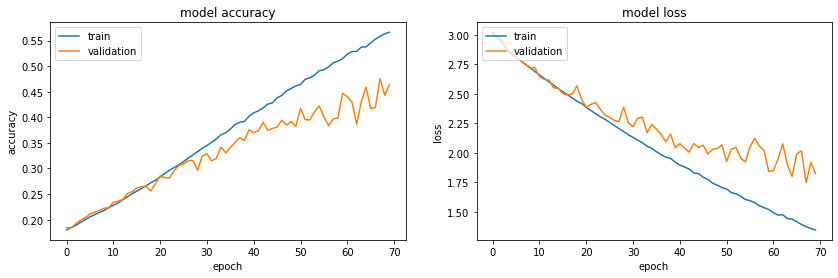

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

#  "Accuracy"
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# "Loss"
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [16]:
model.evaluate(X_test, y_test)     

77/77 [==============================] - 1s 10ms/step - loss: 1.7005 - accuracy: 0.4914


[1.7005491256713867, 0.49137720465660095]

In [17]:
# Our model's prediction
prediction = model.predict(data)

In [18]:
reconstructions = []
for p in prediction:
  r = ""
  for i in p:
    r += str(int_to_char.get(np.argmax(i)))
  reconstructions.append(r)

for i in range(10):
  print("Ground truth:\t{}".format(text_data[i]))
  print("Reconstruction:\t{}\n".format(reconstructions[i]))

Ground truth:	the film won the naacp image award for outstanding
Reconstruction:	the film won the caate mee    wrrr ff  euttttninn 

Ground truth:	the keystone bridge company, founded in 1865 by an
Reconstruction:	the keasmoon seiide  (ompty,  uuueee     185  tt t

Ground truth:	barnaby woods is in the 2nd police district and is
Reconstruction:	barnbby woods is in the 2od coiiee  eiiiaee an  ae

Ground truth:	in march 1959, a state of emergency was declared, 
Reconstruction:	in march 1959, aastate ofe meeeecyy was eeclared, 

Ground truth:	year 546 (dxlvi) was a common year starting on mon
Reconstruction:	eear 546 (dxlvi wwwssa cmmmm  eer  saaaring onnmon

Ground truth:	it was later renamed rogers majestic corporation l
Reconstruction:	it was aater rriand  rreee  mwettta  coommttiion  

Ground truth:	parallelisation of the critical daisy classifier c
Reconstruction:	paaaalelisation of the crrttaaad aisy cassssfee  c

Ground truth:	sander rue (born february 6, 1954) is an american 
Reco